In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:/Users/Gabo0/Desktop/Jupyter Python/Ejercicios Linkedin/base_datos_2008.csv")

In [2]:
df = df.dropna(subset =["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [ ]:
df.columns

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print ("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X) # Encontrar las preddiciones que genea el modelo
print ("Rcuadrado: ", r2_score(Y,Y_pred)) #Aproximación de lo bueno del modelo
# Si se acerca a uno el modelo es bueno, si se acerca a 0 lo contrario

Coeficientes:  [1.01456368]
Rcuadrado:  0.8721021966250481


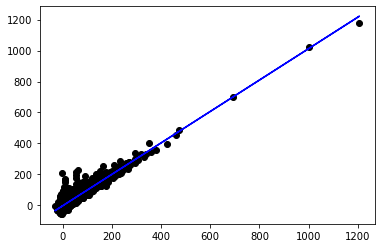

In [5]:
plt.scatter(X[1:10000],Y[1:10000],color = "black")
plt.plot(X[1:10000],Y_pred[1:10000],color="Blue")
plt.show()

Ajustar modelo cuando las X son variables categoricas.

In [8]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']]

df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)

dummies = pd.get_dummies(data=df[['Month','DayofMonth','DayOfWeek','Origin','Dest']])
X = dummies.add(X,fill_value=0)

In [9]:
X.columns

Index(['AirTime', 'DayOfWeek', 'DayofMonth_1', 'DayofMonth_10',
       'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14',
       'DayofMonth_15', 'DayofMonth_16',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=642)

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#Print ("Coeficientes", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.16954451674283244


In [11]:
X = X.add(df[["DepDelay"]], fill_value=0)

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#Print ("Coeficientes", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.9723535696747622
